In [1]:
import pandas as pd
import numpy as np
import psycopg2 # needed to get database exception errors when uploading dataframe
import requests # package for getting data from the web
from zipfile import * # package for unzipping zip files
import sql_functions as sqlf

In [2]:
schema='capstone_organicfood'
table_name = 'organic_dairy_cows_eu_25'

In [3]:
organic_cows = sqlf.get_dataframe(f'select * from {schema}.organic_dairy_cows_eu_25;')

In [4]:
organic_cows

,Country,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Belgium,13.049,12.279,12.955,13.146,16.551,20.101,21.520,22.449,24.308,24.646,:
1,Bulgaria,328,535,789,1.777,2.906,2.955,2.405,3.033,2.689,2.703,2.946
2,Czechia,7.080,7.047,7.402,7.370,6.913,6.686,7.125,7.247,7.292,7.276,6.919
3,Denmark,65.057,62.787,63.261,55.788,58.129,70.993,78.972,78.163,78.796,81.633,80.271
4,Germany,133.095,141.800,148.500,150.283,175.583,203.958,195.750,226.912,226.604,240.630,260.543
5,Estonia,2.542,2.322,2.211,1.938,1.813,1.743,1.835,1.835,1.809,1.852,1.853
6,Ireland,1.737,1.945,1.900,2.163,2.912,2.560,4.752,5.408,3.823,4.656,4.632
7,Greece,3.790,3.492,3.160,4.000,3.990,12.044,14.351,16.956,18.734,21.101,:
8,Spain,4.310,3.303,4.045,4.556,7.086,8.394,8.661,10.413,11.387,12.954,11.597
9,France,95.429,121.443,140.097,113.608,120.112,128.386,145.649,159.578,168.937,190.894,:


In [5]:
# Replace ':' with NaN
organic_cows.replace(':', np.nan, inplace=True)

In [6]:
# Store 'Country' column separately
countries = organic_cows['Country']

In [7]:
# Set 'Country' column as the index
organic_cows.set_index('Country', inplace=True)

In [8]:
# Convert non-numeric values to NaN
organic_cows = organic_cows.apply(pd.to_numeric, errors='coerce')

In [9]:
# Interpolate missing values
organic_cows.interpolate(method='linear', axis=1, inplace=True)

In [10]:
# Convert NaN values back to ':'
organic_cows.replace(np.nan, ':', inplace=True)

In [11]:
# Reset index to bring 'Country' column back
organic_cows.reset_index(inplace=True)

In [12]:
# Display the DataFrame
organic_cows

,Country,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Belgium,13.049,12.279,12.955,13.146,16.551,20.101,21.520,22.449,24.308,24.646,24.646
1,Bulgaria,328.0,535.0,789.0,1.777,2.906,2.955,2.405,3.033,2.689,2.703,2.946
2,Czechia,7.08,7.047,7.402,7.37,6.913,6.686,7.125,7.247,7.292,7.276,6.919
3,Denmark,65.057,62.787,63.261,55.788,58.129,70.993,78.972,78.163,78.796,81.633,80.271
4,Germany,133.095,141.8,148.5,150.283,175.583,203.958,195.750,226.912,226.604,240.630,260.543
5,Estonia,2.542,2.322,2.211,1.938,1.813,1.743,1.835,1.835,1.809,1.852,1.853
6,Ireland,1.737,1.945,1.9,2.163,2.912,2.560,4.752,5.408,3.823,4.656,4.632
7,Greece,3.79,3.492,3.16,4.0,3.990,12.044,14.351,16.956,18.734,21.101,21.101
8,Spain,4.31,3.303,4.045,4.556,7.086,8.394,8.661,10.413,11.387,12.954,11.597
9,France,95.429,121.443,140.097,113.608,120.112,128.386,145.649,159.578,168.937,190.894,190.894


In [13]:
# Remove 'Country' column temporarily to compute summary statistics
numeric_data = organic_cows.drop(columns='Country')

In [14]:
# Calculate summary statistics
summary_stats = numeric_data.describe()

In [15]:
summary_stats

,2016,2017,2018,2019,2020,2021,2022
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,71.116400,68.031600,121.993760,102.986840,144.240920,110.282200,101.584640
std,126.057442,127.913403,249.392192,187.747219,249.600397,211.955622,211.032162
min,1.813000,1.743000,1.169000,1.200000,1.809000,1.532000,1.585000
25%,6.352000,6.686000,8.661000,7.247000,10.393000,7.276000,6.919000
50%,15.171000,14.706000,18.517000,16.956000,18.734000,16.463000,16.463000
75%,75.754000,64.855000,80.547000,79.542000,116.441000,81.633000,80.271000
max,564.000000,596.000000,996.000000,717.000000,878.000000,894.000000,885.000000


In [16]:
# Round off the summary statistics to two decimal places
summary_stats_rounded = summary_stats.round(2)

In [17]:
summary_stats_rounded

,2016,2017,2018,2019,2020,2021,2022
count,25.00,25.00,25.00,25.00,25.00,25.00,25.00
mean,71.12,68.03,121.99,102.99,144.24,110.28,101.58
std,126.06,127.91,249.39,187.75,249.60,211.96,211.03
min,1.81,1.74,1.17,1.20,1.81,1.53,1.58
25%,6.35,6.69,8.66,7.25,10.39,7.28,6.92
50%,15.17,14.71,18.52,16.96,18.73,16.46,16.46
75%,75.75,64.86,80.55,79.54,116.44,81.63,80.27
max,564.00,596.00,996.00,717.00,878.00,894.00,885.00


In [18]:
import matplotlib.pyplot as plt

In [19]:
#Overall Trend in the Organic Dairy Numbers
# Convert columns to numeric type
numeric_columns = organic_cows.columns[1:]  # Exclude the 'Country' column
organic_cows[numeric_columns] = organic_cows[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [20]:
# Aggregate Data
total_counts_per_year = organic_cows.iloc[:, 1:].sum()

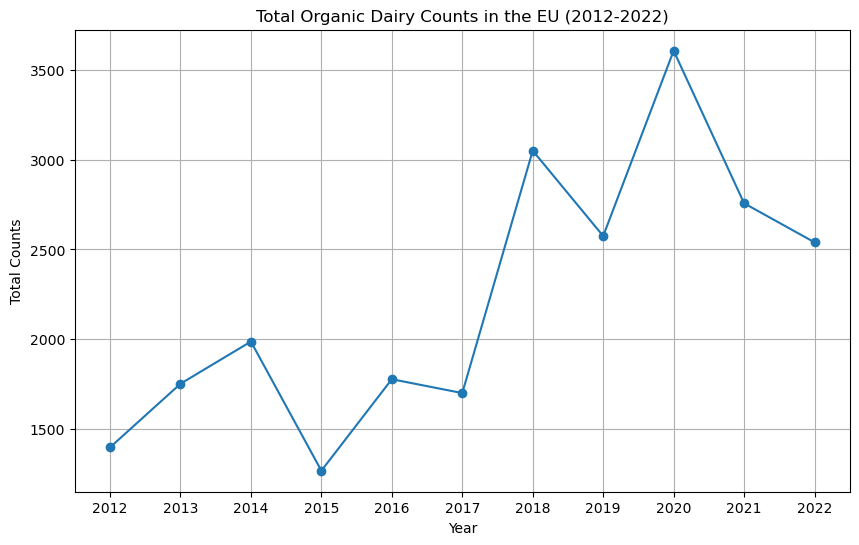

In [21]:
# Plot the Trend
plt.figure(figsize=(10, 6))
plt.plot(total_counts_per_year.index, total_counts_per_year.values, marker='o', linestyle='-')
plt.title('Total Organic Dairy Counts in the EU (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Total Counts')
plt.grid(True)
plt.show()

In [22]:
#Years that stand out in Organic number of Dairy Cows(High or Low dairy Counts)
# Calculate the IQR for each year
Q1 = organic_cows.iloc[:, 1:].quantile(0.25)
Q3 = organic_cows.iloc[:, 1:].quantile(0.75)
IQR = Q3 - Q1

In [23]:
# Find outliers
outliers = (organic_cows.iloc[:, 1:] < (Q1 - 1.5 * IQR)) | (organic_cows.iloc[:, 1:] > (Q3 + 1.5 * IQR))

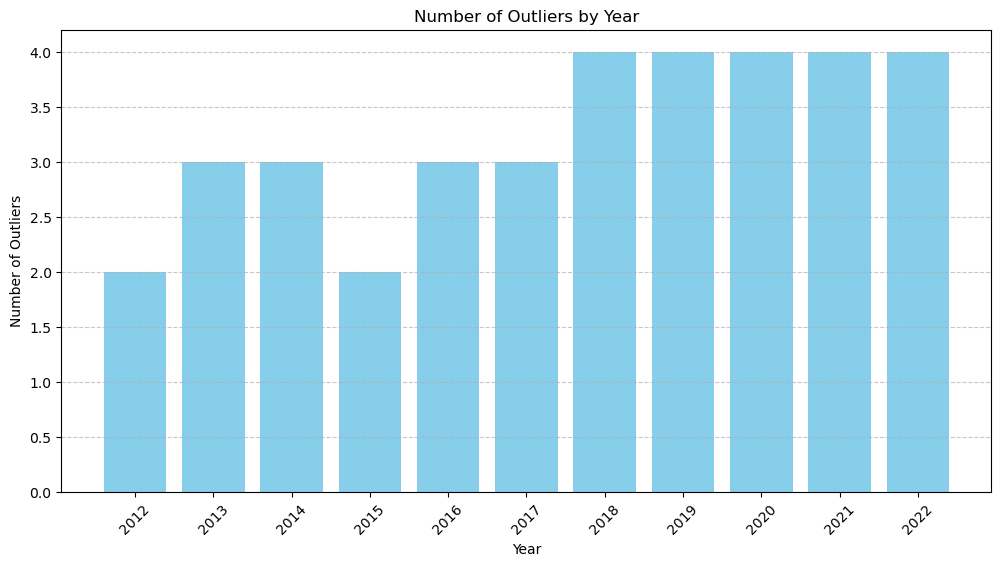

In [24]:
# Visualize outliers
plt.figure(figsize=(12, 6))
plt.bar(organic_cows.columns[1:], outliers.sum(), color='skyblue')
plt.title('Number of Outliers by Year')
plt.xlabel('Year')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
# Calculate yearly changes
yearly_changes = organic_cows.iloc[:, 1:].pct_change(axis=1)

/var/folders/wq/85_dxp_965d1mz8jcysmxbs80000gn/T/ipykernel_1984/3855022417.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  yearly_changes = organic_cows.iloc[:, 1:].pct_change(axis=1)


In [26]:
# Identify significant changes (e.g., absolute change > 10)
significant_changes = yearly_changes.iloc[:, 1:].abs()> 0.1

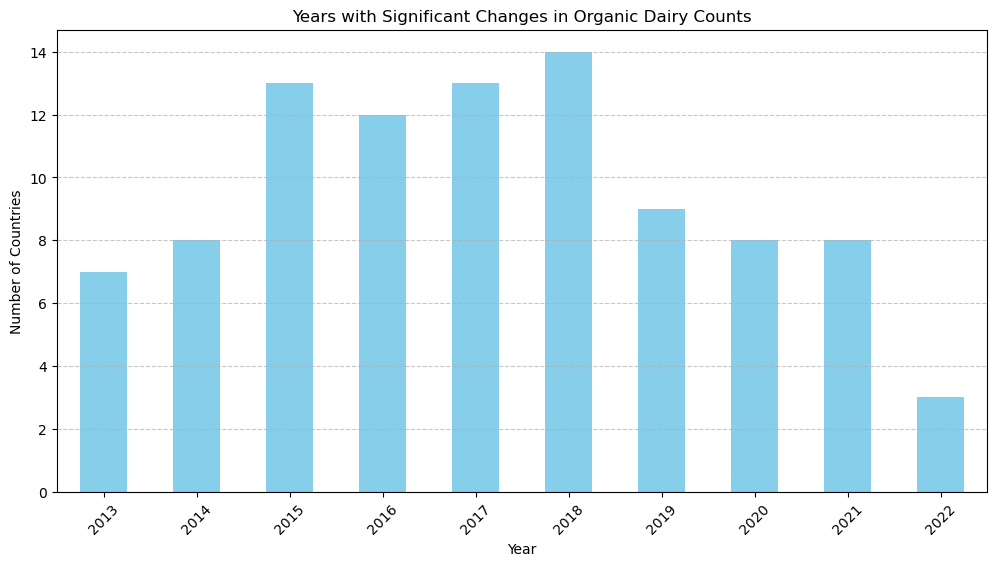

In [27]:
# Visualize significant changes
plt.figure(figsize=(12, 6))
significant_changes.sum().plot(kind='bar', color='skyblue')
plt.title('Years with Significant Changes in Organic Dairy Counts')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:
summary_stats = organic_cows.describe().transpose()


In [29]:
summary_stats

,count,mean,std,min,25%,50%,75%,max
2012,23.0,60.800304,116.846005,0.000,4.0500,11.132,56.3335,482.0
2013,23.0,76.199348,158.941874,0.000,3.3975,12.125,55.4900,591.0
2014,23.0,86.408783,190.412337,0.000,3.6025,12.955,58.2210,789.0
2015,24.0,52.859708,105.602272,1.717,4.4170,12.126,56.1425,508.0
2016,25.0,71.116400,126.057442,1.813,6.3520,15.171,75.7540,564.0
2017,25.0,68.031600,127.913403,1.743,6.6860,14.706,64.8550,596.0
2018,25.0,121.993760,249.392192,1.169,8.6610,18.517,80.5470,996.0
2019,25.0,102.986840,187.747219,1.200,7.2470,16.956,79.5420,717.0
2020,25.0,144.240920,249.600397,1.809,10.3930,18.734,116.4410,878.0
2021,25.0,110.282200,211.955622,1.532,7.2760,16.463,81.6330,894.0


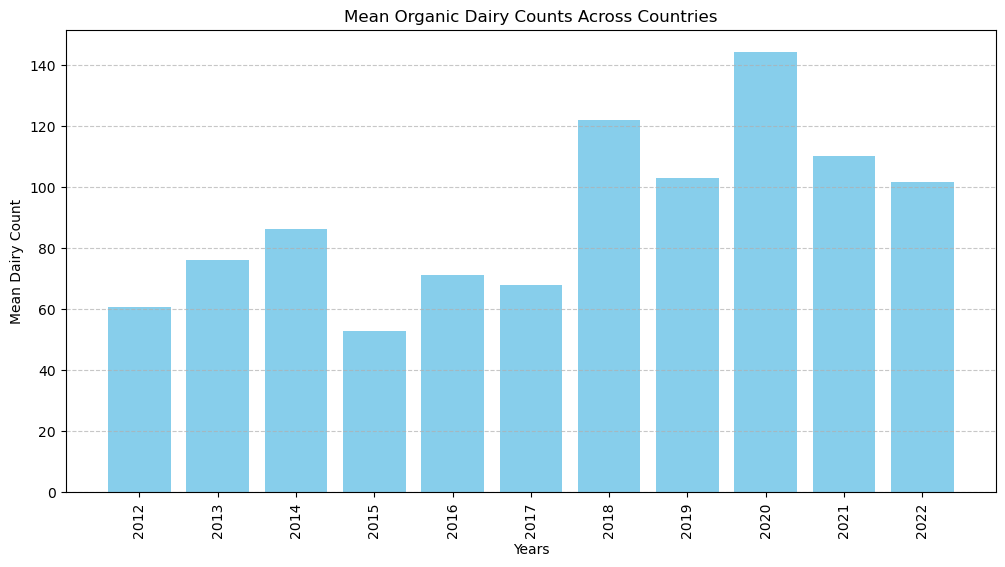

In [40]:
plt.figure(figsize=(12, 6))
plt.bar(summary_stats.index, summary_stats['mean'], color='skyblue')
plt.title('Mean Organic Dairy Counts Across Countries')
plt.xlabel('Years')
plt.ylabel('Mean Dairy Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(1, 0, 'Belgium'),
  Text(2, 0, 'Bulgaria'),
  Text(3, 0, 'Czechia'),
  Text(4, 0, 'Denmark'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'Estonia'),
  Text(7, 0, 'Ireland'),
  Text(8, 0, 'Greece'),
  Text(9, 0, 'Spain'),
  Text(10, 0, 'France'),
  Text(11, 0, 'Croatia'),
  Text(12, 0, 'Italy'),
  Text(13, 0, 'Cyprus'),
  Text(14, 0, 'Latvia'),
  Text(15, 0, 'Lithuania'),
  Text(16, 0, 'Luxembourg'),
  Text(17, 0, 'Hungary'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Austria'),
  Text(20, 0, 'Poland'),
  Text(21, 0, 'Portugal'),
  Text(22, 0, 'Romania'),
  Text(23, 0, 'Slovakia'),
  Text(24, 0, 'Finland'),
  Text(25, 0, 'Sweden')])

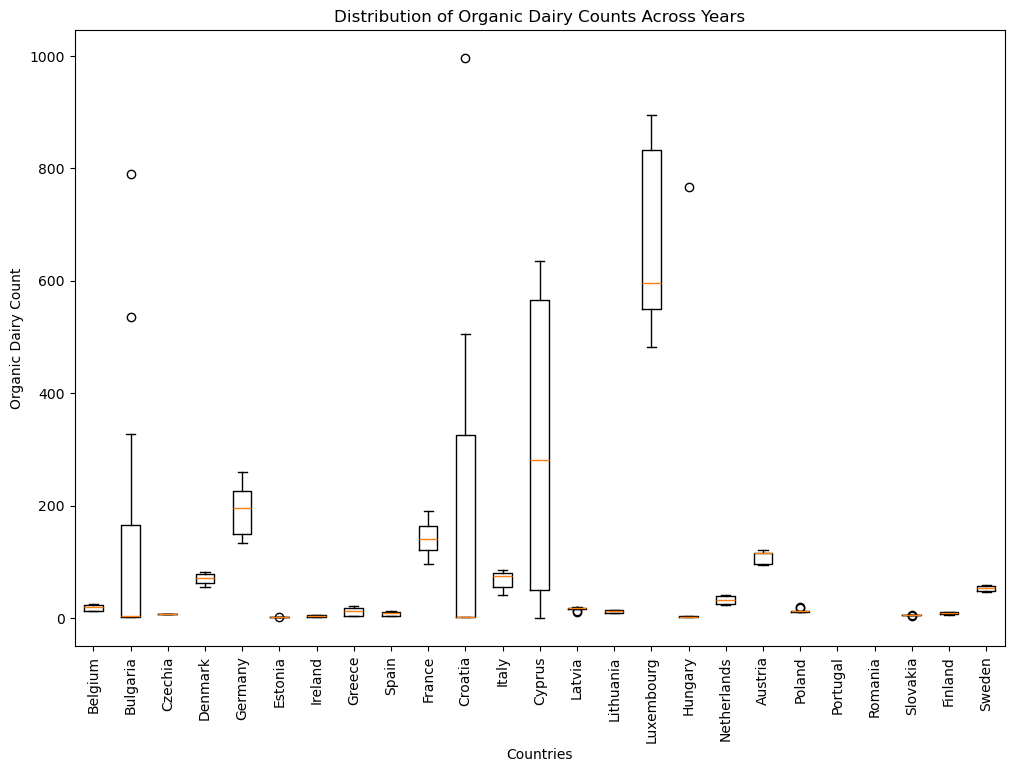

In [39]:
# Distribution of counts across countries, 
# Transpose the DataFrame
organic_cows_transposed = organic_cows.set_index('Country').T
# Set figure size
plt.figure(figsize=(12, 8))
# Set labels and title
plt.title('Distribution of Organic Dairy Counts Across Years')
plt.xlabel('Countries')
plt.ylabel('Organic Dairy Count')
# Create box plot
plt.boxplot(organic_cows_transposed.values, labels=organic_cows_transposed.columns)
# Rotate x-axis labels
plt.xticks(rotation=90)

